In [2]:
import numpy as np
from scipy.stats import norm

def black_scholes(S, K, T, r, sigma, option_type='call'):
    """
    Calculate Black-Scholes option price.

    Parameters:
    S : float : current stock price
    K : float : option strike price
    T : float : time to expiration in years
    r : float : risk-free interest rate
    sigma : float : volatility of the stock
    option_type : str : 'call' for call option, 'put' for put option

    Returns:
    float : option price
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("option_type must be 'call' or 'put'")
    
    return option_price


In [18]:
# Example parameters
S = 34.49     # Current stock price
K = 34.00     # Strike price
T = 6/365    # Time to expiration in years
r = 0.03    # Risk-free interest rate
sigma = 0.4 # Volatility

# Calculate call and put option prices
call_price = black_scholes(S, K, T, r, sigma, option_type='call')
put_price = black_scholes(S, K, T, r, sigma, option_type='put')

print(f"Call Option Price: {call_price:.2f}")
print(f"Put Option Price: {put_price:.2f}")

Call Option Price: 0.07
Put Option Price: 0.06


In [9]:
import yfinance as yf
intc = yf.download("INTC", start='2024-01-01', progress=False)

/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_99671/1230403937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close['vol'] = close.pct_change().rolling(5).std() * np.sqrt(252)


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

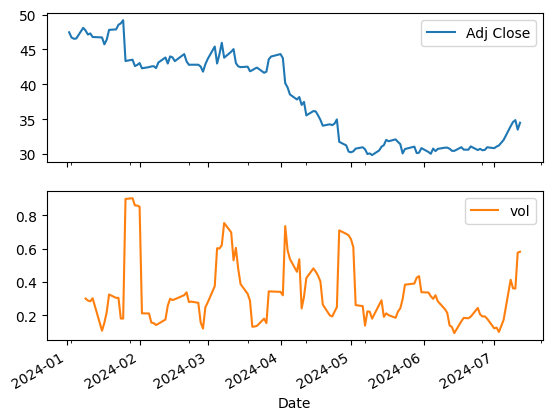

In [34]:
close = intc[['Adj Close']]
close['vol'] = close.pct_change().rolling(5).std() * np.sqrt(252)
close.plot(subplots=True)

In [19]:
import numpy as np
from scipy.stats import norm

def black_scholes(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("option_type must be 'call' or 'put'")
    
    return option_price

def vega(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return S * norm.pdf(d1) * np.sqrt(T)


In [27]:
def implied_volatility(S, K, T, r, market_price, option_type='call', tol=1e-8, max_iterations=100):
    sigma = 0.5  # Initial guess
    for i in range(max_iterations):
        option_price = black_scholes(S, K, T, r, sigma, option_type)
        v = vega(S, K, T, r, sigma)
        
        price_diff = option_price - market_price
        
        if abs(price_diff) < tol:
            return sigma
        
        sigma = sigma - price_diff / v
    
    raise ValueError("Implied volatility did not converge")

S = 34.49
K = 35.00
T = 120/365
r = 0.05
market_price = 3.35

implied_vol = implied_volatility(S, K, T, r, market_price, option_type='call')

print(f"Implied Volatility: {implied_vol:.4f}")


Implied Volatility: 0.4222


In [9]:
from numpy import pi, exp, log, sqrt

In [16]:
def R(K, P, BEP, x):
    '''
    K: strike price
    P: option price
    x: stock price at expiry
    BEP: breakeven point
    '''
    return -P if x <= K else x - BEP

def g(z):
    '''
    Standard distribution for log return
    z: ln(x/S)/(sigma*sqrt(t))
    '''
    return (1/sqrt(2*pi))*exp(-z**2/2)

def z()
g(log(2))

0.3989422804014327


0.3137480385579622